<a href="https://colab.research.google.com/github/BerniceJewel/Computational-Finance-Programming/blob/main/Implied_Volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [2]:
#Defining the BSM Formula for a call
def BSM_call_price(S,K,r,Sigma,t):
    d1 = ( np.log(S / K) + (r + 0.5 * Sigma**2) * (t) ) / ( Sigma * np.sqrt(t) )
    d2 = ( d1 - (Sigma * np.sqrt(t)))
    C_Price = S * norm.cdf(d1) - (K * np.exp( -r * t) * norm.cdf(d2) )
    return C_Price

def Vega(S,K,r,Sigma,t):
    d1 = ( np.log(S / K) + (r + 0.5 * Sigma**2) * (t) ) / ( Sigma * np.sqrt(t) )
    vega = S * norm.pdf(d1) * np.sqrt(t) * np.exp( (-r) * t )
    return vega

In [3]:
#Implied Volatility
def implied_volatility(C,S,K,r,t):
    sigma = 0.15
    tolerance = 0
    max_iteration = 1000
    for i in range( max_iteration ):
        option_price = BSM_call_price( S,K,r,sigma,t)
        vega_price = Vega(S,K,r,sigma,t)
        diff = option_price - C

        if diff == tolerance :
            sigma = sigma
        sigma = sigma - diff/vega_price

    return sigma

S = 21
K = 20
r = 0.1
t = 0.25
sigma = 0.2
C = BSM_call_price(S,K,r,sigma,t)
C

1.764674040245298

In [4]:
#Implied Sigma
sima_value = implied_volatility(C,S,K,r,t)
sima_value

0.20000000000000046

In [5]:
#Implied Surface
T = [0.25, 0.5, 1.0, 1.5]
K = [60, 70, 80, 90, 100, 110, 120, 130, 140]

surface_matrix = [[0 for _ in range(len(T))] for _ in range(len(K))]
S = 100
r = 0.03
sigma = 0.05

for i in range(len(K)):
    for j in range(len(T)):
        k = K[i]
        t = T[j]
        C = BSM_call_price(S, k, r, sigma, t)
        surface_matrix[i][j] = implied_volatility(C, S, k, r, t)
surface_matrix

[[0.13329544574593474,
  0.09219936944260859,
  0.07047487575730006,
  0.05942218360952087],
 [0.09430638935896218,
  0.06961680195560423,
  0.049505038630828155,
  0.05000023246234012],
 [0.06078090640513811,
  0.049998137635973425,
  0.04999999995362076,
  0.04999999999745086],
 [0.05000000000230695,
  0.05000000000006894,
  0.049999999999980595,
  0.04999999999999549],
 [0.04999999999999993,
  0.05000000000000001,
  0.05000000000000068,
  0.05000000000000016],
 [0.050000000000000204,
  0.04999999999999993,
  0.05000000000000037,
  0.050000000000000176],
 [0.04999999999999994,
  0.049999999999998775,
  0.049999999999999885,
  0.04999999999999979],
 [0.05000000000000001,
  0.049999999999999295,
  0.04999999999999973,
  0.04999999999999937],
 [0.049999999999995694,
  0.05000000000000234,
  0.04999999999999885,
  0.05000000000000085]]

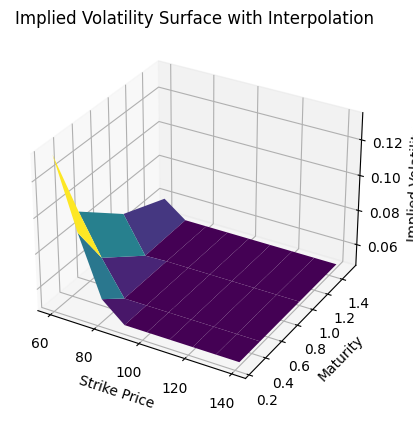

In [7]:
# Creating a meshgrid for strike prices and maturities
T_mesh, K_mesh = np.meshgrid(T, K)

# Converting the surface matrix to a numpy array
surface_matrix = np.array(surface_matrix)

# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
ax.plot_surface(K_mesh, T_mesh, surface_matrix, cmap='viridis')

# Setting the Axis labels and title
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface with Interpolation')

# Show the plot
plt.show()

In [8]:
# Converting the surface matrix to a numpy array
VolatilitySurfaceMatrix = np.array(surface_matrix)

# Setting up the desired grid for interpolation
TInterp = np.linspace(min(T), max(T), 100)
KInterp = np.linspace(min(K), max(K), 100)
TInterpMesh, K_interp_mesh = np.meshgrid(TInterp, KInterp)

# Performing linear interpolation on the surface matrix
VolatilitySurfaceMatrix_interp = griddata((T_mesh.flatten(), K_mesh.flatten()), VolatilitySurfaceMatrix.flatten(),
                                          (TInterpMesh, K_interp_mesh), method='linear')



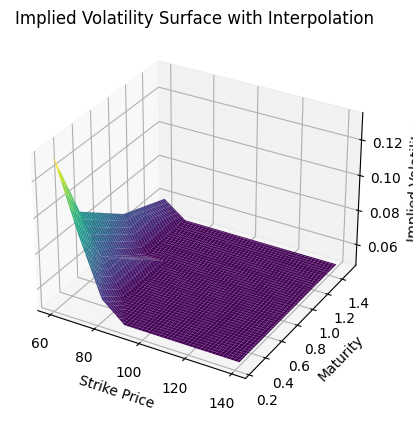

In [10]:
# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the interpolated surface
ax.plot_surface(K_interp_mesh,TInterpMesh, VolatilitySurfaceMatrix_interp, cmap='viridis')

# Setting Axis labels and title
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface with Interpolation')

# Show the plot
plt.show()
